# 금리와 세금이 부동산 가격에 미치는 영향

## [목차]

### 1. EDA
#### 1.1 데이터 입력 및 전처리
#### 1.2 주택 매매, 전세, 월세 가격 지수 시각화

### 2. 금리에 따른 부동산 가격
#### 2.1 금리와 주택 매매 가격 지수
#### 2.2 금리와 주택 전세 가격 지수

### 3. 세금에 따른 부동산 가격
#### 3.1 세금과 주택 매매 가격 지수
#### 3.2 세금과 주택 전세 가격 지수
#### 3.3 세금과 주택 월세 가격 지수

### 4. 결론

----------------------------------------------------------  

# 1. EDA

### 1.1 데이터 입력 및 전처리

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
import pandas as pd
import matplotlib
import seaborn as sns

%matplotlib inline

from plotnine import *
import plotnine as plt

from matplotlib import gridspec

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [173]:
mortgageRate_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/cofix_merge.csv", index_col = 0)

buildingPermit_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/건축허가현황.csv")
domesticConstruction_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/국내건설수주액.csv")
unsoldHouse_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/미분양주택현황.csv")
apartment_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/아파트 실거래가격지수.csv")
monthlyRent_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/유형별_주택월세통합가격지수.csv")
constructionPermit_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/주택건설인허가실적.csv")
homeSales_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/매매가격지수총합.csv", index_col = 0)
houseLease_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/주택전세가격지수(KB).csv")
landpriceFluctuation_data = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/지역별_지가변동률.csv")

data_list1 = [buildingPermit_data, domesticConstruction_data, unsoldHouse_data, apartment_data, monthlyRent_data,
              constructionPermit_data, homeSales_data, houseLease_data, landpriceFluctuation_data]

### 1.2 주택 매매, 월세, 전세가격 지수 시각화


In [174]:
#주택매매가격지수 기본 시각화

# homeSales_data.rename(columns = {homeSales_data.columns[0] : "date"}, inplace = True)
homeSales_data["date"] = pd.to_datetime(homeSales_data["date"])

homeSales_data

,date,단독주택[기준:2022.1 = 100.0],연립주택[기준:2022.1 = 100.0],아파트[기준:2022.1 = 100.0],아파트(서울)[기준:2022.1 = 100.0],총지수[기준:2022.1 = 100.0],총지수(서울)[기준:2022.1 = 100.0]
0,1986-01-01,56.672,37.419,15.910,12.635,27.682,23.473
1,1986-02-01,56.672,37.307,15.910,12.657,27.682,23.473
2,1986-03-01,56.826,37.141,15.881,12.635,27.724,23.440
3,1986-04-01,56.442,37.141,15.793,12.547,27.516,23.311
4,1986-05-01,56.212,36.362,15.676,12.481,27.392,23.117
...,...,...,...,...,...,...,...
434,2022-03-01,100.272,100.574,100.266,100.147,100.306,100.253
435,2022-04-01,100.399,100.953,100.460,100.256,100.517,100.380
436,2022-05-01,100.525,101.376,100.712,100.469,100.768,100.558
437,2022-06-01,100.673,101.737,100.752,100.603,100.869,100.723


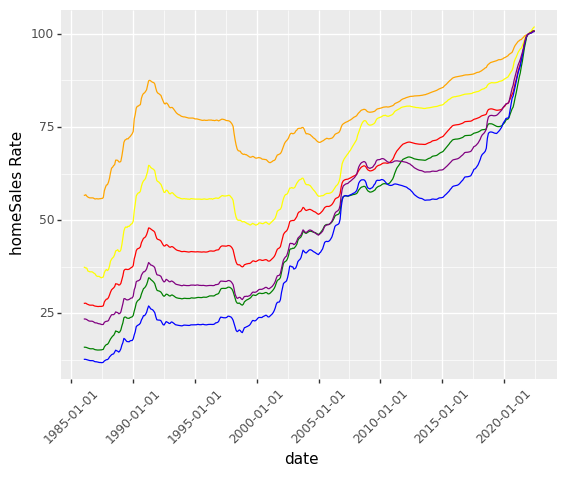

<ggplot: (8771354606153)>

In [175]:
plt.ggplot(homeSales_data, aes(x='date')) + geom_line(aes(y='총지수[기준:2022.1 = 100.0]'), color = 'red')\
+ geom_line(aes(y='단독주택[기준:2022.1 = 100.0]'), color = 'orange')\
+ geom_line(aes(y='연립주택[기준:2022.1 = 100.0]'), color = 'yellow')\
+ geom_line(aes(y='아파트[기준:2022.1 = 100.0]'), color = 'green')\
+ geom_line(aes(y='아파트(서울)[기준:2022.1 = 100.0]'), color = 'blue')\
+ geom_line(aes(y='총지수(서울)[기준:2022.1 = 100.0]'), color = 'purple')\
+ theme(axis_text_x = element_text(angle = 45)) + labs(y = 'homeSales Rate')


# 범례 어떻게 넣는지 얘기하기.


# 빨간선 : 뭐뭐뭐
# 노란선 : 뭐뭐뭐





# , hjust = 1

#### 주택매매가격지수 기본 시각화

[선] Red : 총지수, Orange : 단독주택, Yellow : 연립주택, Green : 아파트, Blue : 아파트(서울), Purple : 총지수(서울)

주택매매가격지수를 기본 시각화 하였으며, 시간이 지남에 따라 매매가격이 전체적으로 증가하는 모습을 보여주고 있다.
단독주택 매매가격지수가 가장 높은 지수로 출발하였으며, 가장 낮았던 서울 아파트 지수가 가장 큰 폭으로 상승하였음을 알 수 있다.

In [176]:
#주택월세가격지수 기본 시각화
#기본 종합 지수만 기본 시각화

monthlyRent_data.rename(columns = {monthlyRent_data.columns[0] : "date"}, inplace = True)
monthlyRent_data["date"] = pd.to_datetime(monthlyRent_data["date"])

monthlyRent_data

,date,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],...,단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
0,2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,...,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
1,2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,...,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2
2,2015-08-01,100.3,99.6,100.9,100.4,101.0,99.9,99.5,99.2,99.7,...,100.1,101.5,99.6,99.3,100.4,100.3,100.8,98.3,100.4,100.2
3,2015-09-01,100.3,99.7,100.9,100.4,101.1,100.0,99.6,99.2,99.7,...,100.1,101.5,99.6,99.4,100.3,100.4,100.8,98.3,100.4,100.2
4,2015-10-01,100.4,99.8,101.0,100.5,101.2,100.1,99.6,99.3,99.8,...,100.2,101.3,99.7,99.3,100.4,100.4,100.9,98.4,100.4,100.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2020-11-01,98.8,99.9,97.8,98.8,96.9,100.3,99.6,99.9,98.3,...,99.4,98.0,99.2,100.1,100.3,99.8,97.2,96.4,99.1,99.2
66,2020-12-01,99.1,100.2,98.1,99.3,97.1,100.5,99.9,100.1,98.6,...,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
67,2021-01-01,99.4,100.4,98.4,99.6,97.3,100.7,100.1,100.5,98.8,...,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
68,2021-02-01,99.5,100.6,98.6,99.9,97.4,100.8,100.4,100.8,98.9,...,99.6,98.0,99.2,100.2,100.4,99.8,97.2,96.4,99.2,99.3


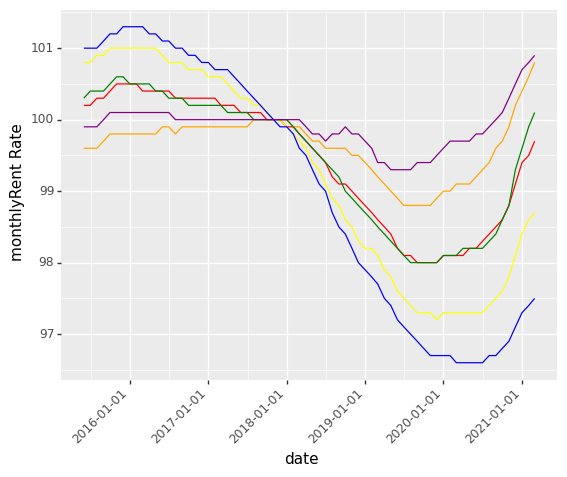

<ggplot: (8771355515269)>

In [177]:
plt.ggplot(monthlyRent_data, aes(x='date')) + geom_line(aes(y='종합-전국[2017.11=100]'), color = 'red')\
+ geom_line(aes(y='종합-수도권[2017.11=100]'), color = 'orange')\
+ geom_line(aes(y='종합-지방[2017.11=100]'), color = 'yellow')\
+ geom_line(aes(y='종합-5대광역시[2017.11=100]'), color = 'green')\
+ geom_line(aes(y='종합-8개도[2017.11=100]'), color = 'blue')\
+ geom_line(aes(y='종합-서울[2017.11=100]'), color = 'purple')\
+ theme(axis_text_x = element_text(angle = 45, hjust = 1)) + labs(y = 'monthlyRent Rate') 

#### 주택월세가격지수 기본 시각화

[선] Red : 전국 종합 지수, Orange : 수도권 종합 지수, Yellow : 지방 종합 지수, Green : 5대광역시 종합 지수, 
     Blue : 8개도 종합 지수, Purple : 서울 종합 지수

주택월세가격지수를 기본 시각화 하였으며, 대표성을 나타낼 수 있는 지역과 종합 지수만을 나타냈다.
2017년 하반기와 2018년 상반기를 기점으로 월세가격지수의 변곡이 나타나고 있다. 2018년 이전까지는 전체적으로 하락하거나 보합하였지만, 2018년 이후부터는 하락, 2019년 하반기부터 상승하는 추세를 보여주고 있다. 8개도 종합 지수가 가장 높은 지수로 출발하였지만, 하락폭도 가장 컸으며, 서울의 종합지수는 전체적인 변화폭이 작아 보합하는 경향을 보여주고 있으며, 최종적으로 가장 높은 지수를 나타내고 있다. 

In [178]:
#주택전세가격지수 기본 시각화

houseLease_data.rename(columns = {houseLease_data.columns[0] : "date"}, inplace = True)
houseLease_data["date"] = pd.to_datetime(houseLease_data["date"])

houseLease_data

,date,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040
...,...,...,...,...,...,...,...
418,2020-11-01,104.886,102.823,105.011,105.140,110.216,109.252
419,2020-12-01,106.043,103.249,105.711,106.608,112.406,110.887
420,2021-01-01,106.925,103.545,106.306,107.688,114.116,112.229
421,2021-02-01,107.730,103.887,106.959,108.651,115.372,113.272


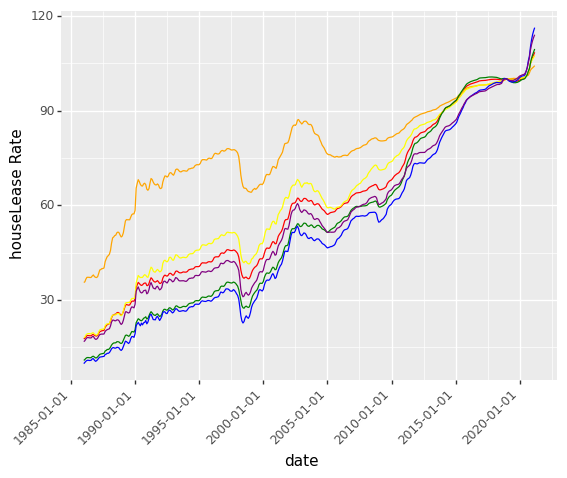

<ggplot: (8771350978657)>

In [179]:
plt.ggplot(houseLease_data, aes(x='date')) + geom_line(aes(y='총지수[2019.01=100]'), color = 'red')\
+ geom_line(aes(y='단독주택[2019.01=100]'), color = 'orange')\
+ geom_line(aes(y='연립주택[2019.01=100]'), color = 'yellow')\
+ geom_line(aes(y='아파트[2019.01=100]'), color = 'green')\
+ geom_line(aes(y='아파트(서울)[2019.01=100]'), color = 'blue')\
+ geom_line(aes(y='총지수(서울)[2019.01=100]'), color = 'purple')\
+ theme(axis_text_x = element_text(angle = 45, hjust = 1)) + labs(y = 'houseLease Rate') 

#### 주택전세가격지수 기본 시각화

[선] Red : 총지수, Orange : 단독주택, Yellow : 연립주택, Green : 아파트, Blue : 아파트(서울), Purple : 총지수(서울)

주택전세가격지수를 기본 시각화 하였으며, 매매가격지수와 마찬가지로 시간이 지남에 따라 전체적으로 증가하는 모습을 보여주고 있다.
다만, 전체적으로 1995년과 2000년 사이에서 큰 폭으로 하락하는 것이 보여지는데, 이는 IMF로 인한 전세가격의 하락으로 예상된다.
단독주택 전세가격지수가 가장 높은 지수로 출발하였으며, 가장 낮았던 서울 아파트 지수가 가장 큰 폭으로 상승하였음을 알 수 있다.

주택 매매, 전세, 월세 지수를 시각화해본 결과 나타난 여러가지 지표가 증가, 감소에 있어서 동일한 양상을 보였다.
* 또한 앞으로의 시각화에서는 통일성과 비교 간평성을 위해 서울의 총지수를 이용하여 진행하였다.

----------------------------------------------------------

# 2. 금리에 따른 부동산 가격

KOSIS 국가통계포털에서 얻은 대출금리를 바탕으로 시각화를 진행해 보고자 한다.

출처: 통화금융통계:대출금리(신규취급액기준), https://kosis.kr/statHtml/statHtml.do?orgId=301&tblId=DT_005Y004&vw_cd=MT_ZTITLE&list_id=301_30106_4_5&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

주택담보대출금리 데이터를 활용하였으며, 2014년 1월부터 2020년 12월까지의 데이터를 사용하였다.

In [180]:
mortgageRate_data = mortgageRate_data.reset_index().sort_values(by = '대상월')
mortgageRate_data['신규취급액기준 COFIX']
mortgageRate_data

,대상월,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
10,2010/01,3.88,4.11,-
9,2010/02,3.62,4.10,-
8,2010/03,3.26,4.11,-
7,2010/04,2.86,4.03,-
6,2010/05,2.89,3.95,-
...,...,...,...,...
147,2022/03,1.72,1.50,1.17
146,2022/04,1.84,1.58,1.22
145,2022/05,1.98,1.68,1.31
144,2022/06,2.38,1.83,1.42


In [181]:
# datetime_df = pd.DataFrame({'year': [i//12 for i in range(2014*12, 2021*12)], 'month': list(range(1,13))*7})
# datetime_df

In [182]:
#데이터의 날짜열 데이터를 pd.to_datetime을 이용하여 Date로 변환

datetime_df = pd.DataFrame({'year': [i//12 for i in range(2010*12, 2023*12)], 'month': list(range(1,13))*13, 'day': [1]*(13*12)})
datelist = pd.to_datetime(datetime_df)

rate_for_graph = pd.DataFrame({'Date': datelist, 'Rate': mortgageRate_data['신규취급액기준 COFIX']})
rate_for_graph

,Date,Rate
0,2010-01-01,3.10
1,2010-02-01,3.01
2,2010-03-01,3.09
3,2010-04-01,3.16
4,2010-05-01,3.10
...,...,...
151,2022-08-01,NaN
152,2022-09-01,NaN
153,2022-10-01,NaN
154,2022-11-01,NaN


In [183]:
rate_for_graph.drop([151,152,153,154,155], inplace = True)

In [184]:
mortgageRate_data

,대상월,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
10,2010/01,3.88,4.11,-
9,2010/02,3.62,4.10,-
8,2010/03,3.26,4.11,-
7,2010/04,2.86,4.03,-
6,2010/05,2.89,3.95,-
...,...,...,...,...
147,2022/03,1.72,1.50,1.17
146,2022/04,1.84,1.58,1.22
145,2022/05,1.98,1.68,1.31
144,2022/06,2.38,1.83,1.42


In [185]:
rate_for_graph

,Date,Rate
0,2010-01-01,3.10
1,2010-02-01,3.01
2,2010-03-01,3.09
3,2010-04-01,3.16
4,2010-05-01,3.10
...,...,...
146,2022-03-01,1.84
147,2022-04-01,1.72
148,2022-05-01,1.70
149,2022-06-01,1.64


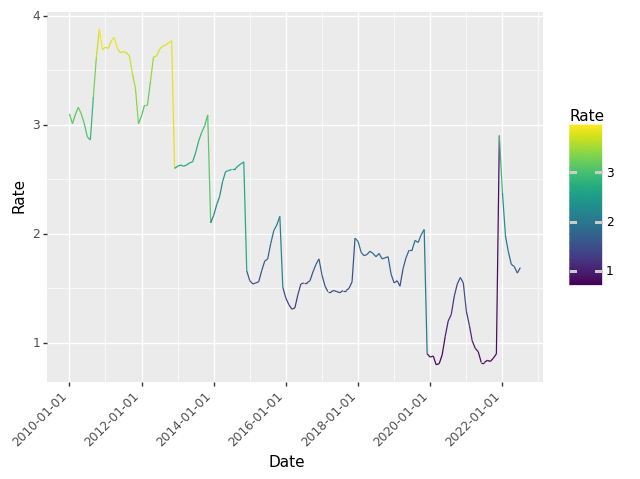

<ggplot: (8771357122065)>

In [186]:
plt.ggplot(rate_for_graph, aes(x='Date', y='Rate', color='Rate')) + geom_line()+ theme(axis_text_x = element_text(angle = 45, hjust= 1))

주택담보대출금리의 기본 시각화를 진행하였다. 2014년부터 2021년까지 전체적으로 감소하는 경향을 보이고 있다.
이를 바탕으로 매매가격지수와 전세가격지수와의 연관성을 분석해보고자 한다.

## 2.1 금리와 주택 매매 가격 지수

In [187]:
data_list1[6]

,date,단독주택[기준:2022.1 = 100.0],연립주택[기준:2022.1 = 100.0],아파트[기준:2022.1 = 100.0],아파트(서울)[기준:2022.1 = 100.0],총지수[기준:2022.1 = 100.0],총지수(서울)[기준:2022.1 = 100.0]
0,1986-01-01,56.672,37.419,15.910,12.635,27.682,23.473
1,1986-02-01,56.672,37.307,15.910,12.657,27.682,23.473
2,1986-03-01,56.826,37.141,15.881,12.635,27.724,23.440
3,1986-04-01,56.442,37.141,15.793,12.547,27.516,23.311
4,1986-05-01,56.212,36.362,15.676,12.481,27.392,23.117
...,...,...,...,...,...,...,...
434,2022-03-01,100.272,100.574,100.266,100.147,100.306,100.253
435,2022-04-01,100.399,100.953,100.460,100.256,100.517,100.380
436,2022-05-01,100.525,101.376,100.712,100.469,100.768,100.558
437,2022-06-01,100.673,101.737,100.752,100.603,100.869,100.723


In [188]:
maemae = data_list1[6].rename(columns = {'date': 'Date'})[['Date', '총지수(서울)[기준:2022.1 = 100.0]']]
maemae = maemae[(maemae['Date']>='2010-01-01')&(maemae['Date']<='2022-07-01')]['총지수(서울)[기준:2022.1 = 100.0]'].reset_index(drop=True)
maemae

0       66.316
1       66.473
2       66.527
3       66.491
4       66.345
        ...   
146    100.253
147    100.380
148    100.558
149    100.723
150    100.790
Name: 총지수(서울)[기준:2022.1 = 100.0], Length: 151, dtype: float64

In [189]:
rate_for_maemae = rate_for_graph.copy()
rate_for_maemae['Rate']= rate_for_graph['Rate']*15
rate_maemae_for_graph = pd.concat([rate_for_maemae, maemae], axis=1)
rate_maemae_for_graph

,Date,Rate,총지수(서울)[기준:2022.1 = 100.0]
0,2010-01-01,46.50,66.316
1,2010-02-01,45.15,66.473
2,2010-03-01,46.35,66.527
3,2010-04-01,47.40,66.491
4,2010-05-01,46.50,66.345
...,...,...,...
146,2022-03-01,27.60,100.253
147,2022-04-01,25.80,100.380
148,2022-05-01,25.50,100.558
149,2022-06-01,24.60,100.723


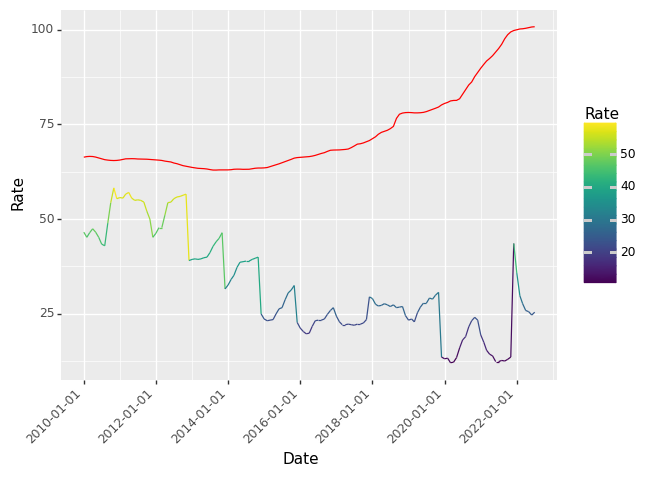

<ggplot: (8771351384193)>

In [190]:
plt.ggplot(rate_maemae_for_graph, aes(x='Date')) + geom_line(aes(y='Rate', color='Rate')) + geom_line(aes(y='총지수(서울)[기준:2022.1 = 100.0]'), color = 'red') + theme(axis_text_x = element_text(angle = 45, hjust = 1))

[선] Red : 서울 총 주택 매매가격지수, Rate : 주택담보대출금리율

금리와 주택 매매가격지수간의 시각화를 진행하였다. 2014년부터 2021년까지 전체적으로 금리는 증가하고 매매지수는 감소하는 반비례하는 경향을 보여준다. 2017년부터 2018년 하반기 사이에 주택담보대출금리가 소폭 상승하는 것이 보여지지만, 주택 매매가격지수 하락에는 미미한 영향을 끼친 것으로 보인다.

* 주택담보대출금리의 감소는 주택 매매 가격을 인상시킨다.
* 주택담보대출금리의 일시적인 변화는 주택 매매 가격 변화에 큰 영향을 못 미친다.

In [191]:
#매매-금리 상관계수

rate_maemae_corr = rate_maemae_for_graph.corr()
rate_maemae_corr

,Rate,총지수(서울)[기준:2022.1 = 100.0]
Rate,1.000000,-0.545809
총지수(서울)[기준:2022.1 = 100.0],-0.545809,1.000000


금리와 주택 매매가격지수간의 상관계수 분석을 진행하였다. 상관계수값이 -0.54324로 강한 음적 상관관계를 나타내고 있다.

## 2.2 금리와 주택 전세 가격 지수

In [192]:
jeonse = data_list1[7].rename(columns = {'date': 'Date'})[['Date', '총지수(서울)[2019.01=100]']]
jeonse = jeonse[(jeonse['Date']>='2014-01-01')&(jeonse['Date']<='2020-12-01')]['총지수(서울)[2019.01=100]'].reset_index(drop=True)
jeonse

0      83.636
1      84.161
2      84.658
3      84.916
4      85.042
       ...   
79    103.631
80    105.276
81    106.698
82    109.252
83    110.887
Name: 총지수(서울)[2019.01=100], Length: 84, dtype: float64

In [193]:
rate_for_jeonse = rate_for_graph.copy()
rate_for_jeonse['Rate']= rate_for_graph['Rate']*15
rate_jeonse_for_graph = pd.concat([rate_for_jeonse, jeonse], axis=1)
rate_jeonse_for_graph

,Date,Rate,총지수(서울)[2019.01=100]
0,2010-01-01,46.50,83.636
1,2010-02-01,45.15,84.161
2,2010-03-01,46.35,84.658
3,2010-04-01,47.40,84.916
4,2010-05-01,46.50,85.042
...,...,...,...
146,2022-03-01,27.60,NaN
147,2022-04-01,25.80,NaN
148,2022-05-01,25.50,NaN
149,2022-06-01,24.60,NaN


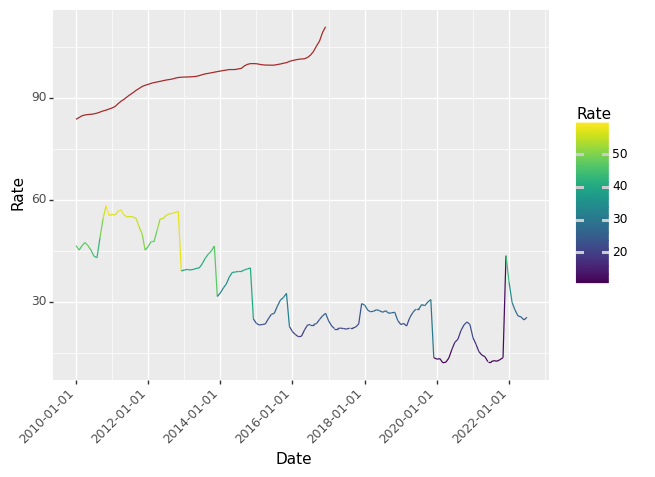

<ggplot: (8771350669633)>

In [194]:
plt.ggplot(rate_jeonse_for_graph, aes(x='Date')) + geom_line(aes(y='Rate', color='Rate')) + geom_line(aes(y='총지수(서울)[2019.01=100]'), color = 'brown') + theme(axis_text_x = element_text(angle = 45, hjust = 1))

[선] Brown : 서울 총 주택 전세가격지수, Rate : 주택담보대출금리율

금리와 주택 전세가격지수간의 시각화를 진행하였다. 2014년부터 2021년까지 전체적으로 금리는 증가하고 전세지수는 감소하는 반비례하는 경향을 보여준다. 2017년부터 2018년 하반기 사이에 주택담보대출금리가 소폭 상승하는 것이 보여지지만, 주택 전세가격지수 하락에는 미미한 영향을 끼친 것으로 보인다.

* 주택담보대출금리의 감소는 주택 전세 가격을 인상시킨다.
* 주택담보대출금리의 일시적인 변화는 주택 전세 가격 변화에 큰 영향을 못 미친다.

In [195]:
#전세-금리 상관계수

rate_jeonse_corr = rate_jeonse_for_graph.corr()
rate_jeonse_corr

,Rate,총지수(서울)[2019.01=100]
Rate,1.000000,-0.740984
총지수(서울)[2019.01=100],-0.740984,1.000000


금리와 주택 전세가격지수간의 상관계수 분석을 진행하였다. 상관계수값이 -0.8836으로 강한 음적 상관관계를 나타내고 있다.

상관관계 분석은 두 변수 혹은 두 집합간의 어떤 선형적 관계를 갖고 있는 지를 분석하는 것이다. 도출된 상관계수는 두 변수간의 연관된 정도를 나타낼 뿐이지 어떠한 인과관계를 설명하는 것은 어렵다. 

금리의 상관관계 분석을 통해 부동산 가격과 강한 음적 상관관계를 가짐을 알 수 있었지만, 이를 시각화를 통해 도출된 결과와 설명하는 것은 어렵다.

# 3. 세금에 따른 부동산 가격  
국세청에서 종합부동산세 세율의 변화 데이터를 얻었다.   
종합부동산세가 처음 시행된 2005년 이후부터의 데이터가 있었고, 주어진 데이터가 주택 가격 지수이므로, 주택분 세율 데이터를 활용하였다.  
출처: https://www.nts.go.kr/nts/cm/cntnts/cntntsView.do?mi=2354&cntntsId=7736  

주택 가격에 따라 세율이 다르기 때문에, 가격과 세율을 함께 고려한 '세율 지수(tax_indicator)'를 생성했다. 앞으로의 시각화에서 이 값이 세금을 나타낸다는 것으로 사용하였다.

In [227]:
# tax05 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2005 종부세율.csv")
# tax06_08 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2006-2008 종부세율.csv")
# tax09_18 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2009-2018 종부세율.csv")
# tax19_20 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2019-2020 종부세율.csv")
# tax = [tax05,tax06_08,tax09_18,tax19_20]

# tax_indicator = []

# for i in range(len(tax)):
#     tax[i]['rate/price']=tax[i]['rate']/tax[i]['price']
#     tax_indicator.append(tax[i]['rate/price'].mean())
    
# datetime_df = pd.DataFrame({'year': [i//12 for i in range(2005*12, 2021*12)], 'month': list(range(1,13))*16, 'day': [1]*(16*12)})
# datelist = pd.to_datetime(datetime_df)
    
# tax_indicator
tax05 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2005 종부세율.csv")
tax06_08 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2006-2008 종부세율.csv")
tax09_18 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2009-2018 종부세율.csv")
tax19_20 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2019-2020 종부세율.csv")
tax21_22 = pd.read_csv("/content/drive/MyDrive/fastcampus/fin/data/data2/2021~2022 종부세율.csv")
tax = [tax05,tax06_08,tax09_18,tax19_20,tax21_22]

tax_indicator = []

for i in range(len(tax)):
    tax[i]['rate/price']=tax[i]['rate']/tax[i]['price']
    tax_indicator.append(tax[i]['rate/price'].mean())
    
datetime_df = pd.DataFrame({'year': [i//12 for i in range(2005*12, 2022*12)], 'month': list(range(1,13))*17, 'day': [1]*(17*12)})
datelist = pd.to_datetime(datetime_df)
    
tax_indicator

[0.06286190633469538,
 0.08148180471178096,
 0.042972672171578845,
 0.055132497282964064,
 0.06337799125935045]

In [228]:
datetime_df = pd.DataFrame({'year': [i//12 for i in range(2005*12, 2022*12)], 'month': list(range(1,13))*17, 'day': [1]*(17*12)})
datelist = pd.to_datetime(datetime_df)

tax_for_graph = pd.DataFrame({'Date': datelist, 'Tax': [tax_indicator[0]]*12+[tax_indicator[1]]*3*12+[tax_indicator[2]]*10*12+[tax_indicator[3]]*2*12+[tax_indicator[4]]*12})
tax_for_graph

,Date,Tax
0,2005-01-01,0.062862
1,2005-02-01,0.062862
2,2005-03-01,0.062862
3,2005-04-01,0.062862
4,2005-05-01,0.062862
...,...,...
199,2021-08-01,0.063378
200,2021-09-01,0.063378
201,2021-10-01,0.063378
202,2021-11-01,0.063378


## 3.1 세금과 주택 매매 가격 지수

In [229]:
data_list1[6]

,date,단독주택[기준:2022.1 = 100.0],연립주택[기준:2022.1 = 100.0],아파트[기준:2022.1 = 100.0],아파트(서울)[기준:2022.1 = 100.0],총지수[기준:2022.1 = 100.0],총지수(서울)[기준:2022.1 = 100.0]
0,1986-01-01,56.672,37.419,15.910,12.635,27.682,23.473
1,1986-02-01,56.672,37.307,15.910,12.657,27.682,23.473
2,1986-03-01,56.826,37.141,15.881,12.635,27.724,23.440
3,1986-04-01,56.442,37.141,15.793,12.547,27.516,23.311
4,1986-05-01,56.212,36.362,15.676,12.481,27.392,23.117
...,...,...,...,...,...,...,...
434,2022-03-01,100.272,100.574,100.266,100.147,100.306,100.253
435,2022-04-01,100.399,100.953,100.460,100.256,100.517,100.380
436,2022-05-01,100.525,101.376,100.712,100.469,100.768,100.558
437,2022-06-01,100.673,101.737,100.752,100.603,100.869,100.723


In [230]:
maemae = data_list1[6].rename(columns = {'date': 'Date'})[['Date', '총지수(서울)[기준:2022.1 = 100.0]']]
maemae = maemae[(maemae['Date']>='2005-01-01')&(maemae['Date']<='2021-12-01')]['총지수(서울)[기준:2022.1 = 100.0]'].reset_index(drop=True)
maemae

0      45.982
1      46.263
2      46.423
3      46.746
4      47.037
        ...  
199    96.163
200    97.624
201    98.696
202    99.420
203    99.787
Name: 총지수(서울)[기준:2022.1 = 100.0], Length: 204, dtype: float64

In [231]:
tax_for_maemae = tax_for_graph.copy()
tax_for_maemae['Tax']= tax_for_graph['Tax']*300+60
maemae_for_graph = pd.concat([tax_for_maemae, maemae], axis=1)
maemae_for_graph

,Date,Tax,총지수(서울)[기준:2022.1 = 100.0]
0,2005-01-01,78.858572,45.982
1,2005-02-01,78.858572,46.263
2,2005-03-01,78.858572,46.423
3,2005-04-01,78.858572,46.746
4,2005-05-01,78.858572,47.037
...,...,...,...
199,2021-08-01,79.013397,96.163
200,2021-09-01,79.013397,97.624
201,2021-10-01,79.013397,98.696
202,2021-11-01,79.013397,99.420


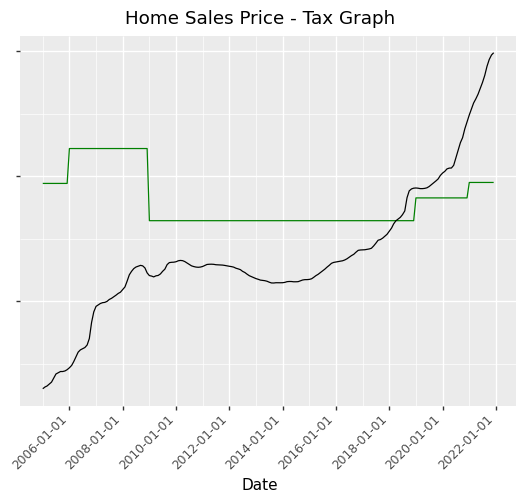

<ggplot: (8771350841105)>

In [232]:
sns.set_color_codes("pastel")

plt.ggplot(maemae_for_graph, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color = 'green') \
+ geom_line(aes(y='총지수(서울)[기준:2022.1 = 100.0]')) \
+ ggtitle('Home Sales Price - Tax Graph') \
+ theme( axis_text_x = element_text(angle = 45, hjust = 1), axis_text_y = element_blank(), axis_title_y = element_blank()) \
# + geom_rect(xmin=12800, xmax=12800+700, ymin=1,ymax=1500, fill="r", alpha=0.002)\
# + geom_rect(xmin=1500, xmax=1500, ymin=50,ymax=120, fill="b", alpha=0.002) \
# + geom_rect(xmin=12850+1900+2800, xmax=12850+1900+700*5, ymin=50,ymax=120, fill="r", alpha=0.002)

[선] Green: 세금 지수, Black: 매매 가격 지수  
[영역] Red: 종합부동산세 인상 구간, Blue: 종합부동산세 인하 구간
  
종합부동산세의 변화가 생긴 세 구간의 주택 가격을 보면, 뚜렷한 양상이 나타난다. 붉은 영역에서는 가격이 가파르게 올랐고, 푸른 영역에서는 가격에 급격히 떨어지는 현상이 생겼다.
- 세금 인상은 주택 매매 가격의 인상을, 세금 인하는 주택 매매 가격의 인하를 일으켰다.  

아래에서 각 구간별로 더 확대하여 양상을 관찰해보자.

In [233]:
maemae_for_graph['Date'][36]

Timestamp('2008-01-01 00:00:00')

In [234]:
# breaks = '1 months'

In [235]:
maemae_date1['Tax']
tax_for_graph['Tax']

0      0.062862
1      0.062862
2      0.062862
3      0.062862
4      0.062862
         ...   
199    0.063378
200    0.063378
201    0.063378
202    0.063378
203    0.063378
Name: Tax, Length: 204, dtype: float64

In [236]:
maemae_date1 = maemae_for_graph.copy()
maemae_date1['총지수(서울)[기준:2022.1 = 100.0]'] = maemae_date1['총지수(서울)[기준:2022.1 = 100.0]']*1.3
maemae_date1['Tax'] = tax_for_graph['Tax']*800+35

maemae_graph1 = plt.ggplot(maemae_date1, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[기준:2022.1 = 100.0]'), color='red') \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1), axis_text_y = element_blank()) \
+ scale_x_date(limits=(maemae_for_graph['Date'][0],maemae_for_graph['Date'][36])) \
# + ylim(110,160)


In [237]:
maemae_date2 = maemae_for_graph.copy()
maemae_date2['총지수(서울)[기준:2022.1 = 100.0]'] = maemae_date2['총지수(서울)[기준:2022.1 = 100.0]']*10
maemae_date2['Tax'] = tax_for_graph['Tax'] *400+785

maemae_graph2 = plt.ggplot(maemae_date2, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[기준:2022.1 = 100.0]'), color='blue') \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1),  axis_text_y = element_blank()) \
+ scale_x_date(limits=(maemae_for_graph['Date'][36],maemae_for_graph['Date'][60]))\
# + ylim(788,860)


In [238]:
maemae_date3 = maemae_for_graph.copy()
maemae_date3['총지수(서울)[기준:2022.1 = 100.0]'] = maemae_date3['총지수(서울)[기준:2022.1 = 100.0]']*5
maemae_date3['Tax'] = tax_for_graph['Tax'] *800+310

maemae_graph3 = plt.ggplot(maemae_date3, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[기준:2022.1 = 100.0]'), color='red') \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1),  axis_text_y = element_blank()) \
+ scale_x_date(limits=(maemae_for_graph['Date'][12*12],maemae_for_graph['Date'][12*15])) \
# + ylim(330,420)

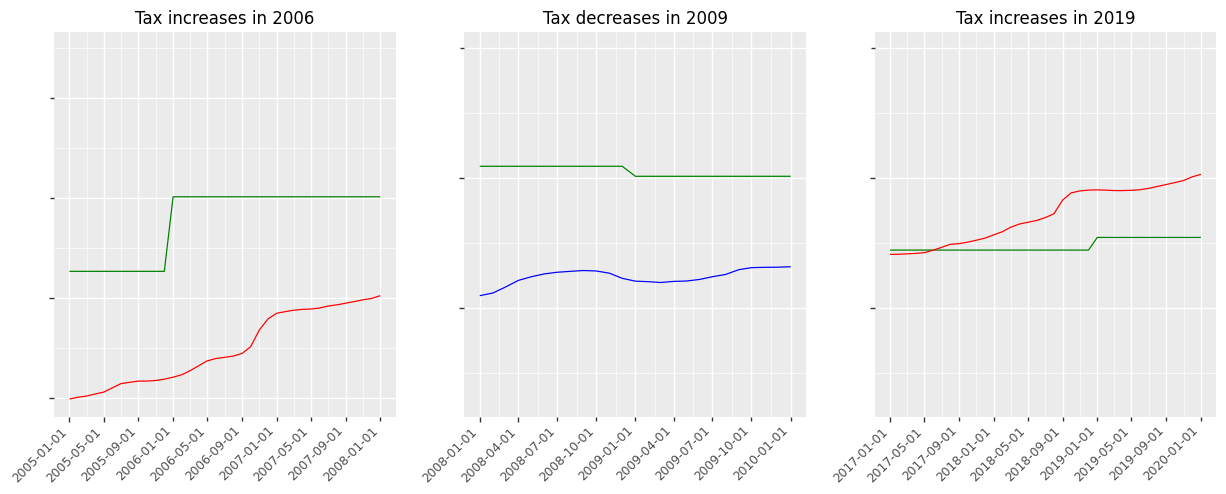

In [239]:
fig = (plt.ggplot()+plt.geom_blank(data=maemae_for_graph)+plt.theme_void()).draw()

fig.set_figheight(5)
fig.set_figwidth(15)

gs=gridspec.GridSpec(1,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax1.title.set_text('Tax increases in 2006')
ax2.title.set_text('Tax decreases in 2009')
ax3.title.set_text('Tax increases in 2019')


_=maemae_graph1._draw_using_figure(fig, [ax1])
_=maemae_graph2._draw_using_figure(fig, [ax2])
_=maemae_graph3._draw_using_figure(fig, [ax3])


fig.show()

[선] Green: 세금 지수, Red&Blue: 매매 가격 지수  

세금이 변화한 세 영역을 확대해서 보면 더 명확한 양상이 나타난다.   
종합부동산세가 인상된 2006년, 2019년에는 세금 지수의 그래프가 증가하는 것과 거의 일치하는 양상으로 매매 가격 지수가 올랐다.  
반대로 세금이 인하된 2009년에는 세금 인하와 동시에 가격이 급격히 인하하였다.  

- 종합부동산세의 인상은 주택 매매 가격을 인상시켰다.
- 종합부동산세의 인하는 주택 매매 가격을 일시적으로 급격히 인하시켰다.  

그러나 2009년의 인하 양상을 보면, 급격히 인하된 후 얼마 안 있어 다시 주택 가격이 오르고, 결국 다시 원래의 가격을 회복한다.  
세금 인하가 일시적으로는 집값을 낮추는 역할을 하였으나, 장기적으로 집값의 상승을 저지시키는데에는 장기적인 정책으로는 효과가 떨어지는 것을 볼 수 있다.

## 3.2 세금과 주택 전세 가격 지수

In [220]:
jeonse = data_list1[7].rename(columns = {'date':'Date'})[['Date', '총지수(서울)[2019.01=100]']]
jeonse = jeonse[(jeonse['Date']>='2005-01-01')&(jeonse['Date']<='2020-12-01')]['총지수(서울)[2019.01=100]'].reset_index(drop=True)
jeonse

0       51.375
1       51.405
2       51.467
3       51.490
4       51.425
        ...   
187    103.631
188    105.276
189    106.698
190    109.252
191    110.887
Name: 총지수(서울)[2019.01=100], Length: 192, dtype: float64

In [221]:
tax_for_jeonse = tax_for_graph.copy()
tax_for_jeonse['Tax']= tax_for_graph['Tax']*300+60
jeonse_for_graph = pd.concat([tax_for_jeonse, jeonse], axis=1)
jeonse_for_graph

,Date,Tax,총지수(서울)[2019.01=100]
0,2005-01-01,85.345451,51.375
1,2005-02-01,85.345451,51.405
2,2005-03-01,85.345451,51.467
3,2005-04-01,85.345451,51.490
4,2005-05-01,85.345451,51.425
...,...,...,...
199,2021-08-01,79.013397,NaN
200,2021-09-01,79.013397,NaN
201,2021-10-01,79.013397,NaN
202,2021-11-01,79.013397,NaN


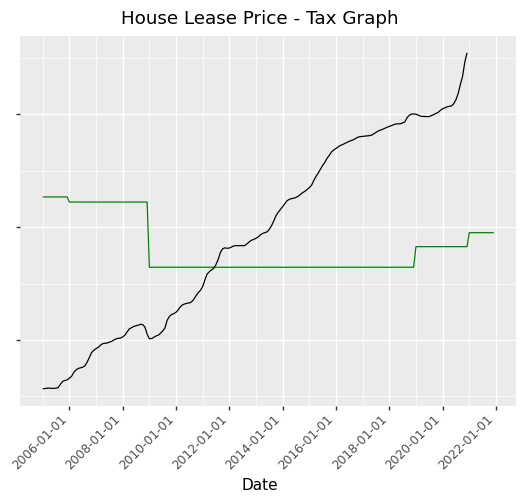

<ggplot: (8771350611825)>

In [222]:
plt.ggplot(jeonse_for_graph, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[2019.01=100]')) \
+ ggtitle('House Lease Price - Tax Graph') \
+ theme( axis_text_x = element_text(angle = 45, hjust = 1), axis_text_y = element_blank(), axis_title_y = element_blank()) \
+ geom_rect(xmin=12800, xmax=12800+700, ymin=50,ymax=120, fill="r", alpha=0.002)\
+ geom_rect(xmin=12850+1050, xmax=12850+1050+700, ymin=50,ymax=120, fill="b", alpha=0.002) \
+ geom_rect(xmin=12850+1900+2800, xmax=12850+1900+700*5, ymin=50,ymax=120, fill="r", alpha=0.002)


[선] Green: 세금 지수, Black: 전세 가격 지수  
[영역] Red: 종합부동산세 인상 구간, Blue: 종합부동산세 인하 구간
  
종합부동산세의 변화가 생긴 세 구간의 주택 전세 가격을 보면, 매매와 마찬가지로 뚜렷한 양상이 나타난다. 붉은 영역에서는 가격이 급격히 오르는 현상, 푸른 영역에서는 가격에 급격히 떨어지는 현상이 생겼다.  

- 세금 인상은 주택 전세 가격의 인상을, 세금 인하는 주택 전세 가격의 인하를 일으켰다.  

아래에서 각 구간별로 더 확대하여 양상을 관찰해보자.

In [223]:
jeonse_date1 = jeonse_for_graph.copy()
jeonse_date1['총지수(서울)[2019.01=100]'] = jeonse_date1['총지수(서울)[2019.01=100]']*4
jeonse_date1['Tax'] = tax_for_graph['Tax']*800+130

jeonse_graph1=plt.ggplot(jeonse_date1, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[2019.01=100]'), color='red') \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1), axis_text_y = element_blank()) \
+ scale_x_date(limits=(jeonse_for_graph['Date'][0],jeonse_for_graph['Date'][36])) \
+ ylim(200,260)

In [224]:
jeonse_date2 = jeonse_for_graph.copy()
jeonse_date2['총지수(서울)[2019.01=100]'] = jeonse_date2['총지수(서울)[2019.01=100]']*10
jeonse_date2['Tax'] = tax_for_graph['Tax']*400+580

jeonse_graph2=plt.ggplot(jeonse_date2, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[2019.01=100]'), color='blue') \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1), axis_text_y = element_blank()) \
+ scale_x_date(limits=(jeonse_for_graph['Date'][36],jeonse_for_graph['Date'][60])) \
+ ylim(590,650)

In [225]:
jeonse_date3 = jeonse_for_graph.copy()
jeonse_date3['총지수(서울)[2019.01=100]'] = jeonse_date3['총지수(서울)[2019.01=100]']*4
jeonse_date3['Tax'] = tax_for_graph['Tax']*400+360

jeonse_graph3 =plt.ggplot(jeonse_date3, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color='green') \
+ geom_line(aes(y='총지수(서울)[2019.01=100]'), color='red') \
+ theme(axis_text_x = element_text(angle = 45, hjust = 1)) \
+ scale_x_date(limits=(jeonse_for_graph['Date'][12*12],jeonse_for_graph['Date'][12*15])) \
+ ylim(375,408)

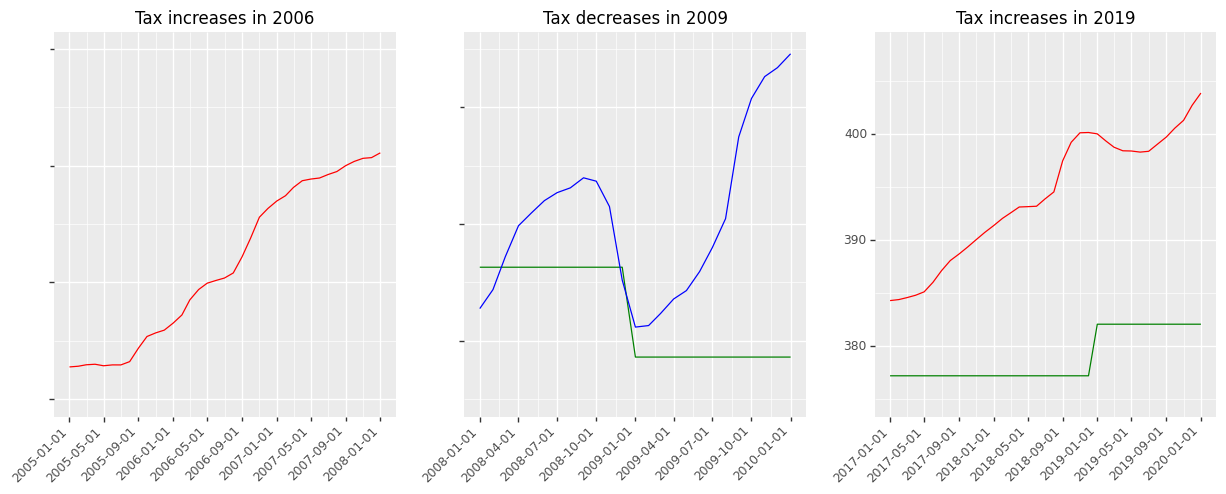

In [226]:
fig = (plt.ggplot()+plt.geom_blank(data=maemae_for_graph)+plt.theme_void()).draw()

fig.set_figheight(5)
fig.set_figwidth(15)

gs=gridspec.GridSpec(1,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax1.title.set_text('Tax increases in 2006')
ax2.title.set_text('Tax decreases in 2009')
ax3.title.set_text('Tax increases in 2019')


_=jeonse_graph1._draw_using_figure(fig, [ax1])
_=jeonse_graph2._draw_using_figure(fig, [ax2])
_=jeonse_graph3._draw_using_figure(fig, [ax3])


fig.show()

[선] Green: 세금 지수, Red&Blue: 매매 가격 지수  

세금이 변화한 세 영역을 확대해서 보면 더 명확한 양상이 나타난다.   
종합부동산세가 인상된 2006년, 2019년에는 세금 지수의 그래프가 증가하는 것과 거의 일치하는 양상으로 전세 가격 지수가 올랐다.  
반대로 세금이 인하된 2009년에는 세금 인하와 동시에 전세 가격이 급격히 인하하였다.  

- 종합부동산세의 인상은 주택 전세 가격을 인상시켰다.
- 종합부동산세의 인하는 주택 전세 가격을 일시적으로 급격히 인하시켰다.  

그러나 2009년의 인하 양상을 보면, 급격히 인하된 후 얼마 안 있어 다시 주택 전세 가격이 오르고, 결국 다시 원래의 가격을 회복한다.  
세금 인하가 일시적으로는 집값을 낮추는 역할을 하였으나, 장기적으로 집값의 상승을 저지시키는데에는 장기적인 정책으로는 효과가 떨어지는 것을 볼 수 있다.
매매가격과 거의 유사하게 세금에 영향을 받는 양상을 관찰할 수 있었다.

## 3.3 세금과 주택 월세 가격 지수

In [ ]:
wolse = data_list1[4][['date', '종합-서울[2017.11=100]']]['종합-서울[2017.11=100]']
tax_for_wolse = tax_for_graph.copy()
tax_for_wolse = tax_for_wolse[tax_for_graph['Date']>='2015-06-01'].reset_index(drop=True)
wolse_for_graph = pd.concat([tax_for_wolse, wolse], axis=1).dropna()
wolse_for_graph['Tax']=wolse_for_graph['Tax']*16
wolse_for_graph['종합-서울[2017.11=100]']=wolse_for_graph['종합-서울[2017.11=100]']-100
wolse_for_graph

,Date,Tax,종합-서울[2017.11=100]
0,2015-06-01,0.727163,-0.1
1,2015-07-01,0.727163,-0.1
2,2015-08-01,0.727163,-0.1
3,2015-09-01,0.727163,0.0
4,2015-10-01,0.727163,0.1
...,...,...,...
62,2020-08-01,1.498996,-0.1
63,2020-09-01,1.498996,0.0
64,2020-10-01,1.498996,0.1
65,2020-11-01,1.498996,0.3


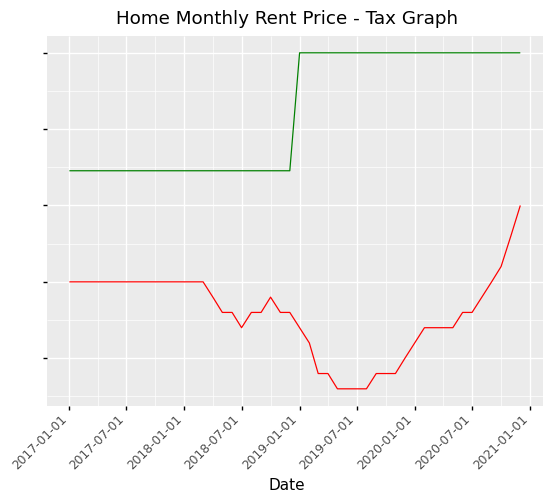

<ggplot: (161484414648)>

In [ ]:
plt.ggplot(wolse_for_graph, aes(x='Date')) \
+ geom_line(aes(y='Tax'), color = 'green') \
+ geom_line(aes(y='종합-서울[2017.11=100]'), color='red') \
+ ggtitle('Home Monthly Rent Price - Tax Graph') \
+ theme( axis_text_x = element_text(angle = 45, hjust = 1), axis_text_y = element_blank(), axis_title_y = element_blank()) \
+ scale_x_date(limits=(maemae_for_graph['Date'][12*12],maemae_for_graph['Date'][12*16-1]))


[선] Green: 세금 지수, Red: 주택 월세 가격 지수  

월세 데이터의 경우 2017년 이후부터만 있었기 때문에, 월세는 2019년의 세금 인상 한 영역에서만 관찰할 수 있었다.  
월세 또한 마찬가지로, 세금인상 전까지 감소하는 듯한 형태였지만 세금이 인상되자 급격히 증가하는 것을 확인할 수 있었다.  

* 종합부동산세의 인상은 월세를 더 높이는 현상을 일으켰다.

# 4. 결론  

주택담보대출금리의 경우, 금리와 주택의 매매, 전세 가격은 모두 뚜렷하게 반비례하는 경향을 보여주고 있다.
주택담보대출금리가 인하되면 주택의 매매, 전세 가격을 모두 인상시켰다.
또한, 주택담보대출금리의 일시적인 변화는 주택 가격 변화에 큰 영향을 못 미쳤다.
장기적인 관점에서 금리의 변화 추세가가 곧 주택 가격 변화 추세를 결정지을 것으로 보인다. 

종합부동산세의 경우, 세금의 인상은 주택의 매매, 전세, 월세 가격을 모두 인상시켰다. 
세금의 인하는 일시적으로 주택 가격을 인하시키는 효과를 보였지만, 장기적인 효과로 이어지진 못했다.  
반대 현상인 종부세 인상을 통한 집값 하락은 관찰된 바 없다.

결론적으로 2010년 상반기부터 2020년까지 부동산 가격은 점차 증가하였으며, 금리는 하락하였고, 종합부동산세는 인상되었다.
하지만 부동산 가격에 영향을 미치는 요인은 세금과 금리 외에도 많은 요인들이 있다.
세금은 정부의 정책에 의해 좌지우지 많이되어 정치적인 견해를 더 고려해야 될 필요가 있고, 금리는 미국이라는 큰 채권시장에 의해
좌지우지 되므로 경제적인 견해를 더 고려해야 한다. 이번 시각화에서는 간단한 경향성을 파악할 수 있었지만, 부동산 가격에 영향을
미치는 경제적, 정치적 주요 요인들을 더 연관지어 뚜렷한 경향성 분석과 예측을 진행보고자 하는 바램이 있다. :)